## Linear regression

In [13]:
install.packages("fpp", repos = "http://cran.us.r-project.org", dependencies = TRUE)
library(fpp)
library('forecast')

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


Online Video Characteristics and Transcoding Time Dataset Data Set
http://archive.ics.uci.edu/ml/datasets/Auto+MPG

Data Description:

1. id = Youtube videp id
2. duration = duration of video
3. bitrate bitrate(video) = video bitrate
4. height = height of video in pixles
5. width = width of video in pixles
6. frame rate = actual video frame rate
7. frame rate(est.) = estimated video frame rate
8. codec = coding standard used for the video
9. category = YouTube video category
10. url = direct link to video (has expiration date)
11. i = number of i frames in the video
12. p = number of p frames in the video
13. b = number of b frames in the video
14. frames = number of frames in video
15. i_size = total size in byte of i videos
16. p_size = total size in byte of p videos
17. b_size = total size in byte of b videos
18. size = total size of video
19. o_codec = output codec used for transcoding
20. o_bitrate = output bitrate used for transcoding
21. o_framerate = output framerate used for transcoding
22. o_width = output width in pixel used for transcoding
23. o_height = output height used in pixel for transcoding
24. umem = total codec allocated memory for transcoding
25. utime = total transcoding time for transcoding



Call:
lm(formula = data1$size ~ data1$duration)

Residuals:
       Min         1Q     Median         3Q        Max 
-1.853e+09 -1.735e+07 -6.892e+06 -1.662e+06  7.166e+08 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    2513851.4   264983.4   9.487   <2e-16 ***
data1$duration   78589.4      653.2 120.307   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 49210000 on 68782 degrees of freedom
Multiple R-squared:  0.1738,	Adjusted R-squared:  0.1738 
F-statistic: 1.447e+04 on 1 and 68782 DF,  p-value: < 2.2e-16


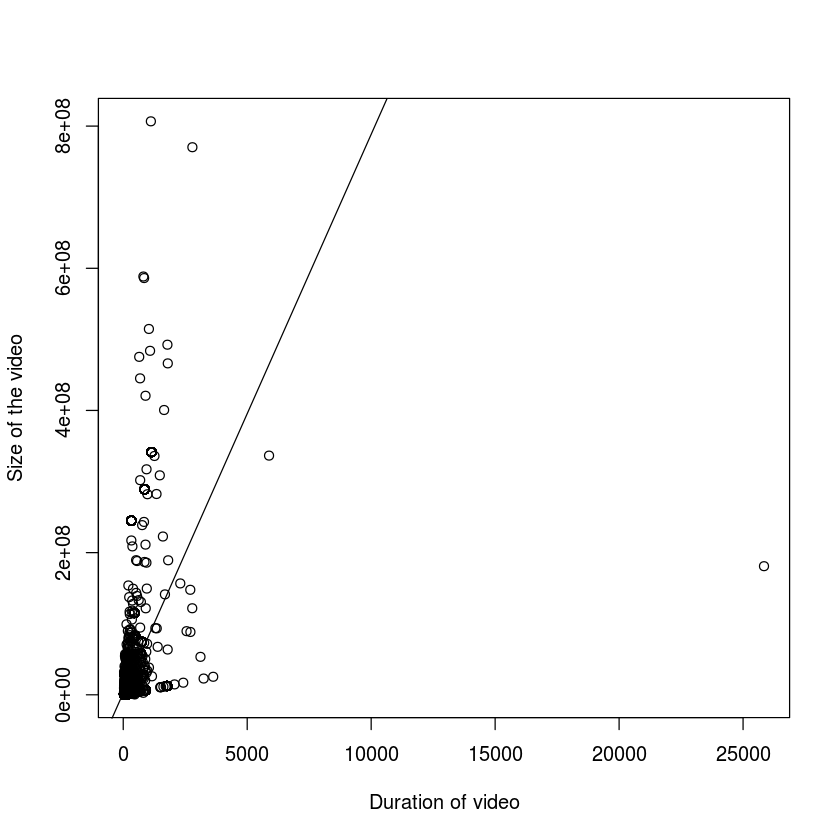

In [14]:
data1 = read.table("transcoding_measurement.tsv",header=TRUE)
plot(data1$size ~ data1$duration,  xlab = "Duration of video", ylab = "Size of the video")
fit = lm(data1$size ~ data1$duration ) ; abline(fit) #Add straight lines through the current plot
summary(fit) 

We verify by the plot that the duration of a video does affect the size of it. Typically, we can see the the duration and the size of a video are connected with a linear relationship. The Multiple R-squared error is 0.1738, meaning that the x-y variables are a bit connected. We can see that the line intersects for sure many observations, although the data1-set is too big and we can not see distinct it so much. They(x-y) could be less connected(we tested previously another set with an R-squared error of 0.004!)

Also, the estimated regression line is : \hat y = 2513851.4 + 78589.4x

### Residual plots

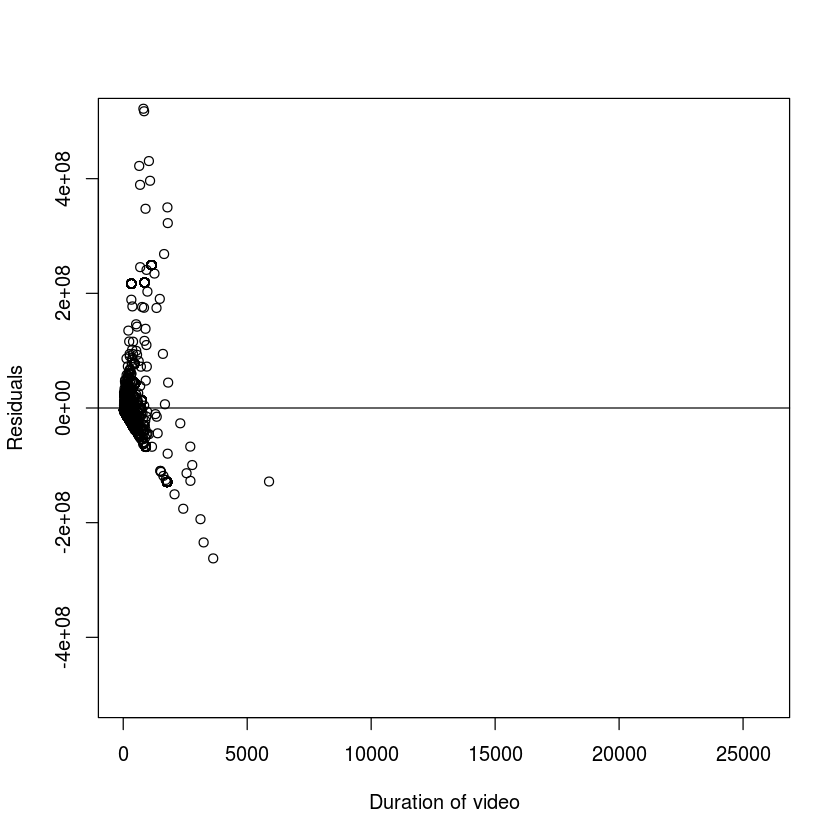

In [15]:
res = residuals(fit) # Calculate residuals from the modeling function 'lm'
plot(res ~ data1$duration, ylab = "Residuals", xlab = "Duration of video", ylim = c(-5.0e+08,5.0e+08)); abline(0,0)

Seeing the plot, we can understand that most of the residuals are between the -5.0e+08 and the +5.03e+08 values(0e+00 and 1e+08 value specifically,if we add the ylim parameter in the plot), with most of the observations having values 0 and 3000 about the duration of the video.
So, yes, there is a pattern since the values are not so scattered around.

### Forecasting with regression

1 
12758501

Warning message in forecast.lm(fit, newdata[1] > 130.3567):
“newdata column names not specified, defaulting to first variable required.”

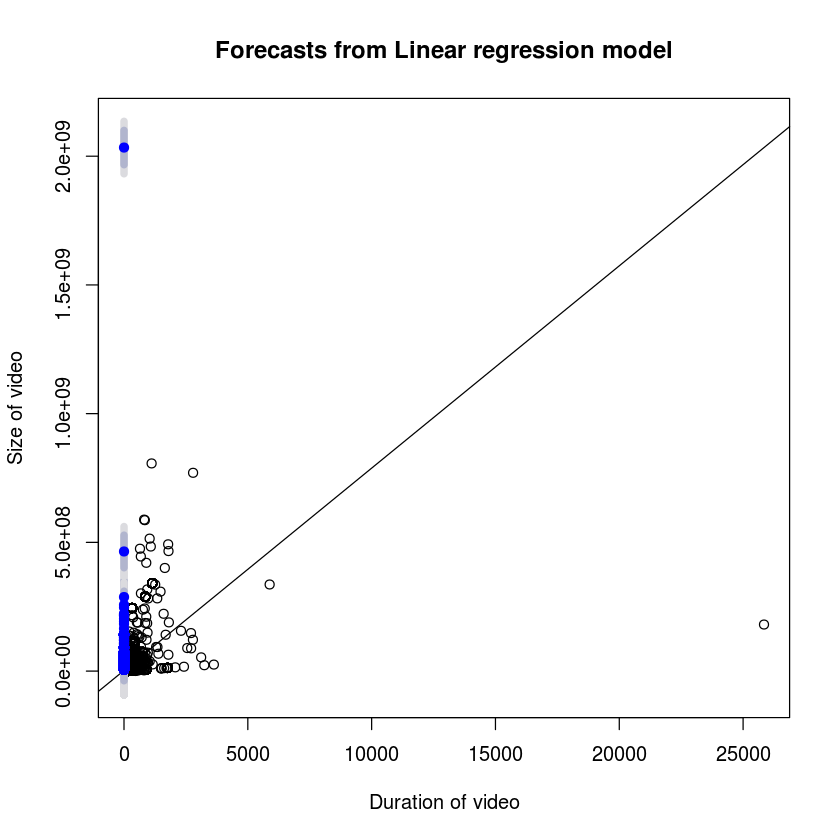

In [16]:
fitted(fit)[1]
newdata = data.frame(data1$duration)

# It will take a while due to the large size of the data(see global env)
fcast <- forecast(fit,newdata[1] > 130.3567)#=data.frame(duration>30))

plot(fcast, xlab="Duration of video", ylab="Size of video")

This will plot us the result of the forecasting method for the the videos(data) that have duration larger thatn 130.3567 time units

### P-value and Confidence intervals

In [17]:
summary(fit)$coef # We calculate the probability of obtaining a value of  β^1
                  # as large as we have calculated if the null hypothesis were true
confint(fit, level = 0.95) # Provide an interval estimate for β^1 in the fitted model

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),2513851.43,264983.375,9.486827,2.454433e-21
data1$duration,78589.37,653.238,120.307422,0.000000e+00


,2.5 %,97.5 %
(Intercept),1994484.42,3033218.45
data1$duration,77309.03,79869.72


### Non-linear functional forms

Simply transforming variables y and/or x and then estimating a regression model using the transformed variables is the simplest way of obtaining a non-linear specification.
We are going to use the log-log functional form 


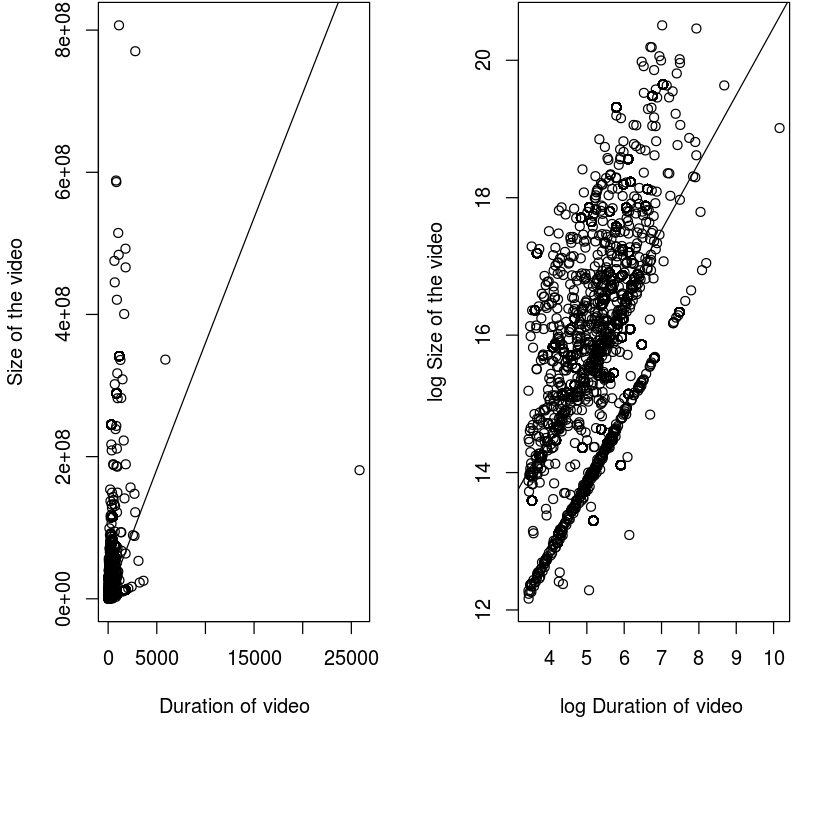

In [18]:
par(mfrow=c(1,2), mar=c(9,4,0,2)+0.1)
fit2 <- lm(log(data1$size) ~ log(data1$duration)) # Do the fit for : log(y_i) = β_0 + β_1*log(x_i) + ε_i

plot(data1$size ~ data1$duration,  xlab = "Duration of video", ylab = "Size of the video") # Plot standard x-y form
lines(1:25000, exp(fit2$coef[1]+fit2$coef[2]*log(1:25000))) 

plot(log(data1$size) ~ log(data1$duration),  xlab = "log Duration of video ", ylab = "log Size of the video") # log-log functional form
abline(fit2) # Draw a line through our second fitting model
# See that in this log-log form, the regression is much better since it gets through a lot more points

### Residuals in log-log functional form

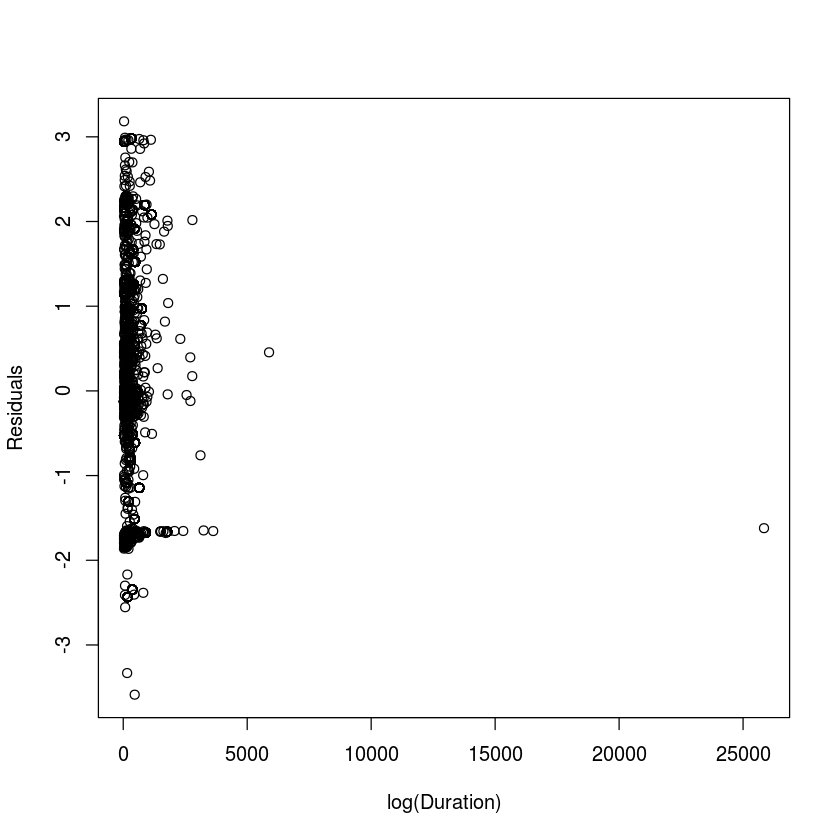

In [19]:
res = residuals(fit2)
plot( res ~ data1$duration, xlab = "log(Duration)", ylab= "Residuals")

We see that most residuals are between -2 and +3 while most log(Duration) points is between 0 and 3000
Oh, and there is our lonely value right there with log(Duration) = ~25000


### Regression with time series data

We are going to replace our x variable with 'utime' now.
utime = total transcoding time for transcoding
We are trying to impersonate utime with 'time' in this series of data, for the sake of simplicity.
So, we can give as input a "future" 'utime' value and we will 'scenario-based' forecast the size of the video, after we do the regression.

Warning: It would be better to replace the 'utime' variable with a 'Year' variable. As said, we do not want to change the data only because of this example!

Warning message in plot.xy(xy, type, ...):
“plot type 'single' will be truncated to first character”

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),21760322.7,241825.69,89.98350,0.000000e+00
data1$utime,326380.9,12756.45,25.58555,1.043438e-143


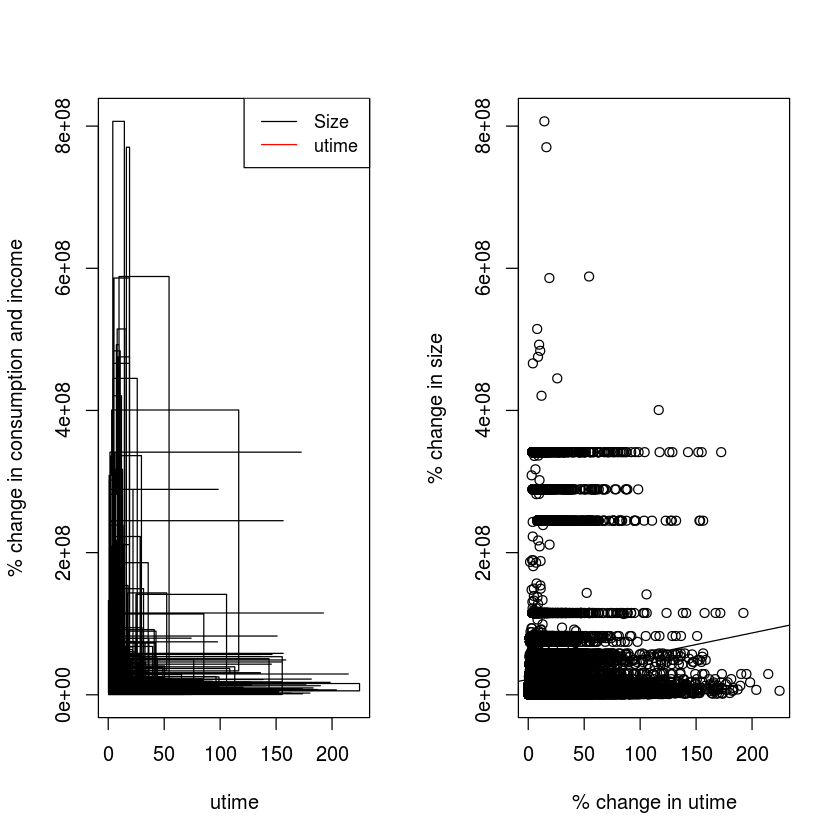

In [20]:
par(mfrow=c(1,2)) # Change parameters for plot

fit.ex3 <- lm(data1$size ~ data1$utime) # Linear Model Fit for size ~ utime
plot(data1$size ~ data1$utime, ylab="% change in consumption and income", type="single", col=1:2, xlab="utime") #plot

legend("topright", legend=c("Size","utime"), lty=1, col=c(1,2), cex=.9)

plot(data1$size ~ data1$utime, ylab="% change in size", xlab="% change in utime")

abline(fit.ex3)
summary(fit.ex3)$coef


The scatter plot includes the estimated regression line \hat{C} = 21760322.7 + 325380.9i

### Linear trend

A common feature of time series data is a trend. Using regression we can model and forecast the trend in time series data by including  t=1,…,T,t=1,…,T,  as a predictor variable: y_t = β_0 + β_1*t + ε_t

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),2.297039e+07,412800.85727,55.645212,0.000000e+00
trend,5.968019e+01,10.39463,5.741444,9.426612e-09


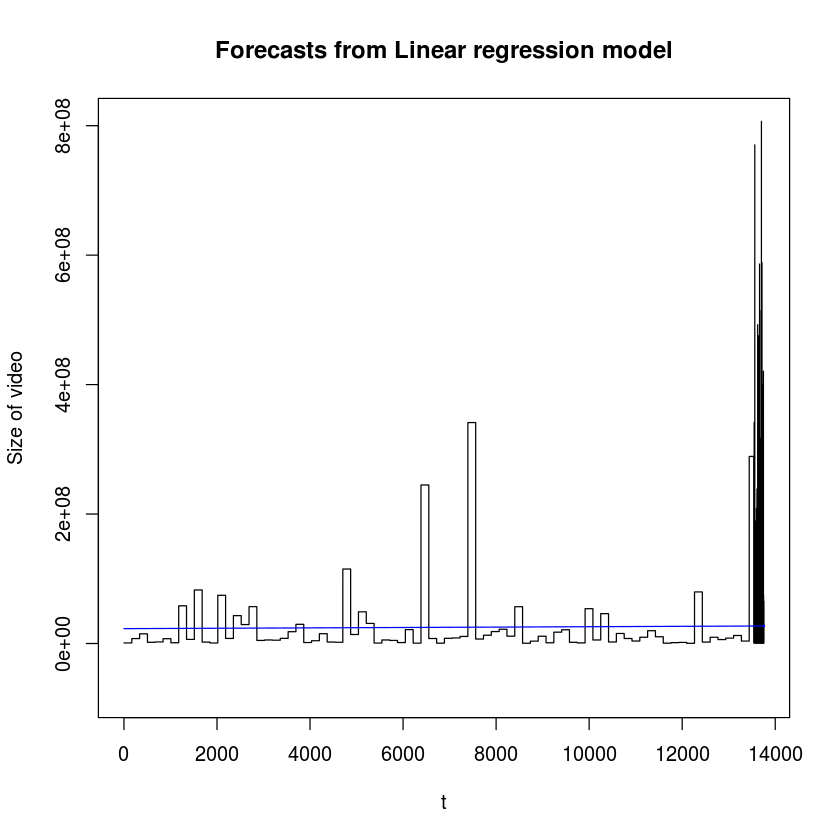

In [21]:
y=ts(data1[15], frequency = 5) # Take column No.11-size for each video- and make it a Time-Series object
fit.ex4 <- tslm(y ~ trend) # Do Linear Modeling Fit for y ~ trend
f <- forecast(fit.ex4, h=5,level=c(80,95)) # And do the forecast
plot(f, ylab="Size of video", xlab="t")

lines(fitted(fit.ex4),col="blue")
summary(fit.ex4)$coef


### Residual autocorrelation

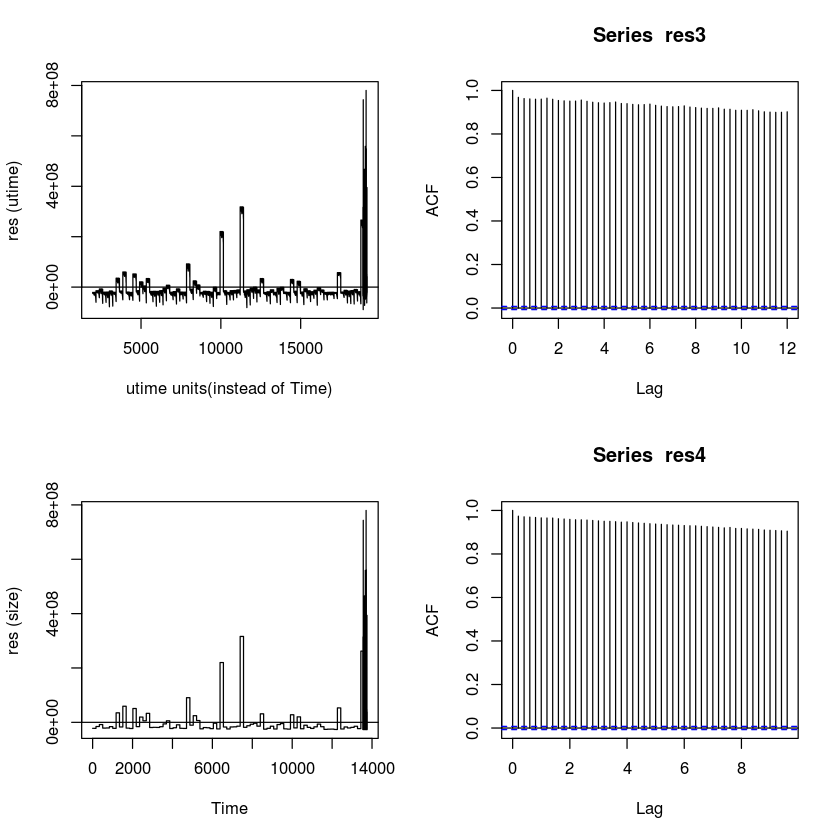

In [22]:
par(mfrow=c(2,2))
res3 <- ts(resid(fit.ex3),s=1970.25,f=4) # Create time-series object using the residuals of 'fit.ex3' variable
plot.ts(res3,ylab="res (utime)", xlab = "utime units(instead of Time)")  
abline(0,0)

acf(res3) # autocorrelation function for the model res3 (utime residuals)

## Same thing for 'fit.ex4' variable 
res4 <- resid(fit.ex4)
plot(res4,ylab="res (size)")
abline(0,0)
acf(res4)